<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Selection Best features  ....
<a class="anchor" id="1"></a> 

<img src="https://miro.medium.com/max/594/1*nyC9bOwnK16Cl8jFYTyEFQ.png" width=400>

- Data loading
- Data Imputation
- Lasso deployement 
= Model Evaluation


https://youtu.be/T4nZDuakYlU?list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq

https://youtu.be/xlHk4okO8Ls

https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15

https://github.com/Yimeng-Zhang/feature-engineering-and-feature-selection/blob/master/4.5_Demo_Feature_Selection_Hybrid_method.ipynb



Lasso Regression (L1 Regularization)

What it is: Lasso (Least Absolute Shrinkage and Selection Operator) regression is a linear regression technique that adds a penalty term to the ordinary least squares (OLS) cost function. This penalty is proportional to the absolute value of the coefficients.   

Why it's used:

Regularization: The penalty term shrinks the coefficients of less important features towards zero. This helps prevent overfitting, especially when you have many features or when some features are highly correlated.
Feature Selection: A key feature of Lasso is that it can force some coefficients to become exactly zero. This effectively performs feature selection, automatically identifying and discarding irrelevant features. This is different from Ridge regression (L2 regularization), which shrinks coefficients but rarely sets them to zero.
The Cost Function: The cost function Lasso minimizes is:

RSS + alpha * sum(|beta_j|)
 Where:

RSS is the residual sum of squares (the standard OLS term).
alpha is the regularization parameter (a hyperparameter you need to tune). A higher alpha means stronger regularization (more shrinkage and more coefficients set to zero).
beta_j are the regression coefficients.
sum(|beta_j|) is the sum of the absolute values of the coefficients (the L1 penalty).
2. Cross-Validation (CV)

What it is: Cross-validation is a technique for evaluating how well a model will generalize to unseen data. It involves splitting the data into multiple "folds," training the model on some folds (the training set), and evaluating it on the remaining fold (the validation set). This is repeated multiple times, with each fold serving as the validation set once.
Why it's used: It provides a more reliable estimate of model performance than a single train/test split, especially when you have limited data. It helps you choose the best hyperparameters (like alpha in Lasso) without "peeking" at the final test set.
Common Types:
k-fold Cross-Validation: The data is divided into k folds.
Leave-One-Out Cross-Validation (LOOCV): Each data point is used as the validation set once (extreme case of k-fold where k = number of samples).
Stratified k-fold: Ensures that each fold has roughly the same proportion of samples from each class (important for classification problems with imbalanced classes).
3. LassoCV in scikit-learn

sklearn.linear_model.LassoCV: This class in scikit-learn combines Lasso regression with cross-validation to automatically find the best value of the regularization parameter (alpha).
cv parameter:: Determines the cross-validation splitting strategy. If None, to use the default 5-fold cross-validation.
alphas parameter:: List of alphas where to compute the models. If None alphas are set automatically.

In [202]:
#تحميل البيانات
import pandas as pd
df= pd.read_csv("../data/HousePrice3.csv", index_col=0)

In [203]:
df.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
346,347,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal,151500
1089,1090,120,FV,37.0,3316,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,197000
1369,1370,20,RL,48.0,10635,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,232000


![](../imgs/featureEngin.png)

## Conduct Recursive Feature Elimination

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCond  

In [205]:
df.select_dtypes("number").head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [206]:
df.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 78, dtype: int64

In [207]:
df.select_dtypes("number").head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [208]:
df.select_dtypes("number").iloc[:,:-1]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,240,366,0,112,0,0,0,0,4,2010


In [209]:
#  imputing Categoical data
from sklearn.impute import SimpleImputer
df_cat= df.select_dtypes("object")
columns= df_cat.columns
imputer= SimpleImputer(strategy="most_frequent")
df[columns] = pd.DataFrame(imputer.fit_transform(df_cat), columns=columns)

In [210]:
#  imputing Numerical  data
from sklearn.impute import SimpleImputer
df_num= df.select_dtypes("number")
columns= df_num.columns
imputer= SimpleImputer(strategy="most_frequent")
df[columns]= pd.DataFrame(imputer.fit_transform(df_num), columns=columns)

In [213]:
df.isna().sum().sort_values(ascending=False)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

![](../imgs/dataSplit.jpg)

In [245]:

X=  df.select_dtypes("number").iloc[:,:-1]
y= df.SalePrice

In [246]:
X.shape , y.shape

((1460, 34), (1460,))

In [247]:
from sklearn.linear_model import   LassoCV
lasso = LassoCV(cv=5, random_state=42)  # cv for cross-validation, random_state for reproducibility
lasso.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % lasso.alpha_)
print("Best score using built-in LassoCV: %f" %lasso.score(X,y))
coef = pd.Series(lasso.coef_, index = X.columns)


Best alpha using built-in LassoCV: 209067.774683
Best score using built-in LassoCV: 0.723705


In [248]:
# تقسيم البيانات
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)

![](../imgs/model.png)

In [249]:
from sklearn.linear_model import   LassoCV
reg = LassoCV()
reg.fit(X_train, y_train)  # Train on the training data

print("Best alpha:", reg.alpha_)
print("Training score:", reg.score(X_train, y_train))  # Score on training data (still biased)
print("Test score:", reg.score(X_test, y_test))    

Best alpha: 235795.09991899296
Training score: 0.693348702873058
Test score: 0.7567700780071833


In [250]:
coef = pd.Series(reg.coef_, index = X_train.columns)


Sorted Coefficients (Absolute Value):
 YearBuilt        321.822664
YearRemodAdd      87.869797
GarageArea        74.830840
GrLivArea         59.000402
MasVnrArea        34.437408
WoodDeckSF        32.990153
PoolArea          29.570327
TotalBsmtSF       26.469162
ScreenPorch        9.414284
BsmtFinSF1         8.386896
Id                 4.829249
MiscVal            3.107709
LotArea            0.340996
MSSubClass         0.000000
OverallQual        0.000000
LotFrontage        0.000000
BsmtUnfSF          0.000000
OverallCond        0.000000
BsmtHalfBath       0.000000
BsmtFullBath       0.000000
LowQualFinSF       0.000000
2ndFlrSF           0.000000
BsmtFinSF2         0.000000
KitchenAbvGr       0.000000
FullBath           0.000000
HalfBath           0.000000
TotRmsAbvGrd       0.000000
Fireplaces         0.000000
BedroomAbvGr       0.000000
OpenPorchSF        0.000000
3SsnPorch          0.000000
EnclosedPorch      0.000000
MoSold             0.000000
YrSold             0.000000
dtype: f

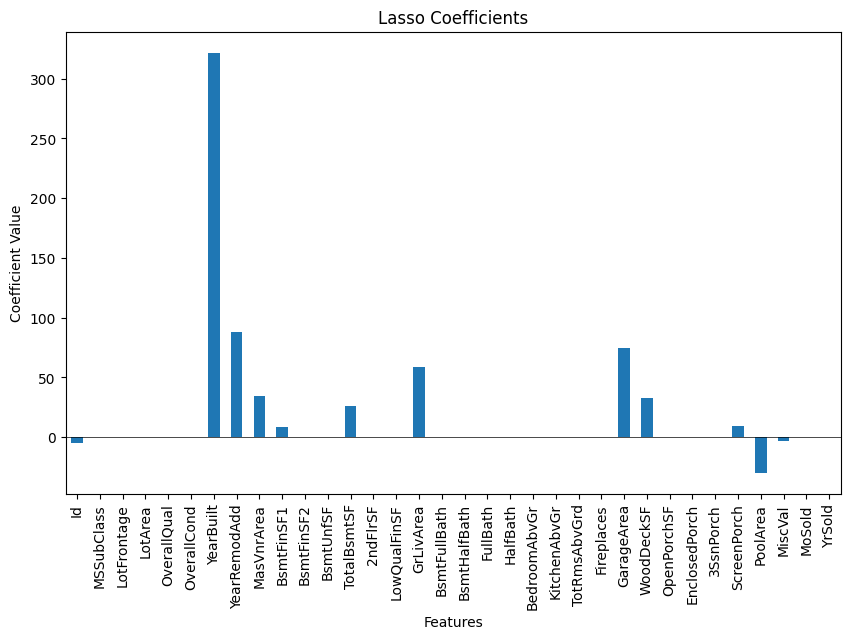

In [251]:
# Sort the coefficients by absolute value (magnitude)
coef_sorted = coef.abs().sort_values(ascending=False)
print("\nSorted Coefficients (Absolute Value):\n", coef_sorted)

# Plot the coefficients
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
coef.plot(kind='bar')
plt.title('Lasso Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.axhline(0, color='black', linewidth=0.5)  # Add a horizontal line at y=0
plt.show()

In [252]:
coef

Id                -4.829249
MSSubClass        -0.000000
LotFrontage       -0.000000
LotArea            0.340996
OverallQual        0.000000
OverallCond        0.000000
YearBuilt        321.822664
YearRemodAdd      87.869797
MasVnrArea        34.437408
BsmtFinSF1         8.386896
BsmtFinSF2        -0.000000
BsmtUnfSF          0.000000
TotalBsmtSF       26.469162
2ndFlrSF           0.000000
LowQualFinSF      -0.000000
GrLivArea         59.000402
BsmtFullBath       0.000000
BsmtHalfBath      -0.000000
FullBath           0.000000
HalfBath           0.000000
BedroomAbvGr      -0.000000
KitchenAbvGr      -0.000000
TotRmsAbvGrd       0.000000
Fireplaces         0.000000
GarageArea        74.830840
WoodDeckSF        32.990153
OpenPorchSF        0.000000
EnclosedPorch     -0.000000
3SsnPorch          0.000000
ScreenPorch        9.414284
PoolArea         -29.570327
MiscVal           -3.107709
MoSold             0.000000
YrSold             0.000000
dtype: float64

In [253]:
import numpy as np
coef[np.abs(coef)>0]

Id               -4.829249
LotArea           0.340996
YearBuilt       321.822664
YearRemodAdd     87.869797
MasVnrArea       34.437408
BsmtFinSF1        8.386896
TotalBsmtSF      26.469162
GrLivArea        59.000402
GarageArea       74.830840
WoodDeckSF       32.990153
ScreenPorch       9.414284
PoolArea        -29.570327
MiscVal          -3.107709
dtype: float64

In [254]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 13 variables and eliminated the other 21 variables


In [255]:
# features importance sorting 
import  numpy as np
coef[np.abs(coef)>0].sort_values(ascending=False)

YearBuilt       321.822664
YearRemodAdd     87.869797
GarageArea       74.830840
GrLivArea        59.000402
MasVnrArea       34.437408
WoodDeckSF       32.990153
TotalBsmtSF      26.469162
ScreenPorch       9.414284
BsmtFinSF1        8.386896
LotArea           0.340996
MiscVal          -3.107709
Id               -4.829249
PoolArea        -29.570327
dtype: float64

In [256]:
np.abs(coef).nlargest(10)

YearBuilt       321.822664
YearRemodAdd     87.869797
GarageArea       74.830840
GrLivArea        59.000402
MasVnrArea       34.437408
WoodDeckSF       32.990153
PoolArea         29.570327
TotalBsmtSF      26.469162
ScreenPorch       9.414284
BsmtFinSF1        8.386896
dtype: float64

In [257]:
# قائمة الخصائص الأكثر أهمية
features_kept=np.abs(coef).nlargest(10).index
features_kept

Index(['YearBuilt', 'YearRemodAdd', 'GarageArea', 'GrLivArea', 'MasVnrArea',
       'WoodDeckSF', 'PoolArea', 'TotalBsmtSF', 'ScreenPorch', 'BsmtFinSF1'],
      dtype='object')

Text(0.5, 1.0, 'Feature importance using Lasso Model')

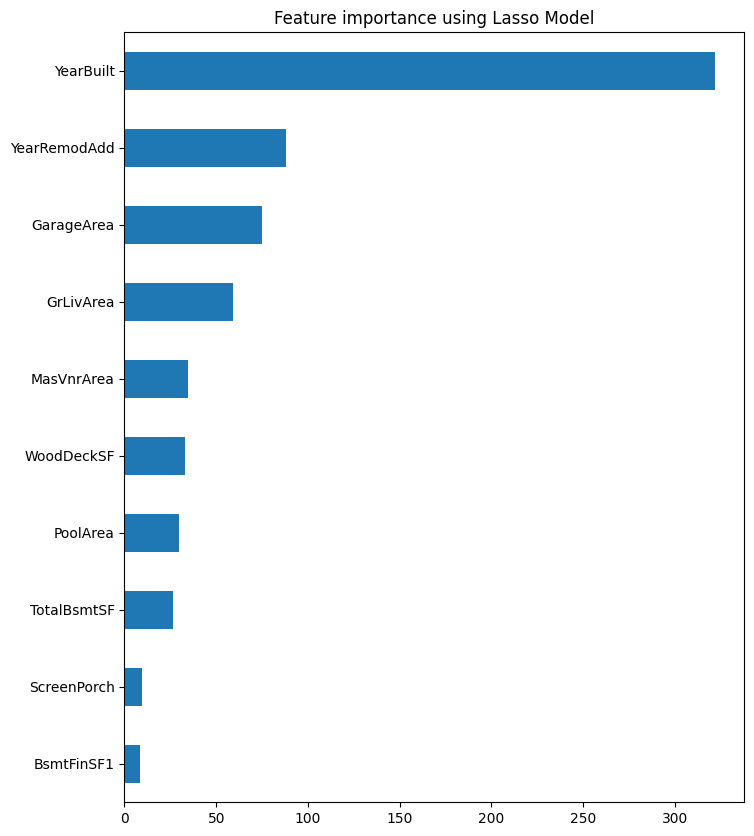

In [234]:
# التخطيط البياني لأهم الخصائص
import matplotlib.pyplot as plt

imp_coef = np.abs(coef).nlargest(10).sort_values()
import matplotlib
plt.figure(figsize=(8.0, 10.0))
imp_coef.plot(kind = "barh")
#  np.log1p(imp_coef)
plt.title("Feature importance using Lasso Model")

In [235]:
# اظهار البيانات
X[features_kept].head()

,YearBuilt,YearRemodAdd,GarageArea,GrLivArea,MasVnrArea,WoodDeckSF,PoolArea,TotalBsmtSF,ScreenPorch,BsmtFinSF1
0,2003.0,2003.0,548.0,1710.0,196.0,0.0,0.0,856.0,0.0,706.0
1,1976.0,1976.0,460.0,1262.0,0.0,298.0,0.0,1262.0,0.0,978.0
2,2001.0,2002.0,608.0,1786.0,162.0,0.0,0.0,920.0,0.0,486.0
3,1915.0,1970.0,642.0,1717.0,0.0,0.0,0.0,756.0,0.0,216.0
4,2000.0,2000.0,836.0,2198.0,350.0,192.0,0.0,1145.0,0.0,655.0


In [236]:
# اضافة عمود الهدف
df_select= pd.concat([X[features_kept], y], axis=1)
df_select.sample(3)

,YearBuilt,YearRemodAdd,GarageArea,GrLivArea,MasVnrArea,WoodDeckSF,PoolArea,TotalBsmtSF,ScreenPorch,BsmtFinSF1,SalePrice
651,1940.0,1950.0,296.0,1510.0,0.0,120.0,0.0,755.0,0.0,0.0,108000.0
1022,1930.0,1950.0,160.0,1248.0,0.0,0.0,0.0,912.0,0.0,324.0,87000.0
1373,2001.0,2002.0,804.0,2633.0,705.0,314.0,0.0,2633.0,0.0,1282.0,466500.0


In [237]:
# حفظ البيانات
df_select.to_csv("../data/features_kept1.csv")

In [238]:
",".join(df_select.columns)

'YearBuilt,YearRemodAdd,GarageArea,GrLivArea,MasVnrArea,WoodDeckSF,PoolArea,TotalBsmtSF,ScreenPorch,BsmtFinSF1,SalePrice'

In [239]:
# حفظ الخصائص التي تم تحديدها
with open("../data/features_selected.txt", "w") as f :
  f.write(",".join(df_select.columns))


In [240]:
# التأكد من حفظ الملف

open("../data/features_selected.txt" , "r").read()


'YearBuilt,YearRemodAdd,GarageArea,GrLivArea,MasVnrArea,WoodDeckSF,PoolArea,TotalBsmtSF,ScreenPorch,BsmtFinSF1,SalePrice'

In [241]:
# تحميل الخصائص على شكل مصفوفة
fl=open("../data/features_selected.txt" , "r").read().split(",")
fl

['YearBuilt',
 'YearRemodAdd',
 'GarageArea',
 'GrLivArea',
 'MasVnrArea',
 'WoodDeckSF',
 'PoolArea',
 'TotalBsmtSF',
 'ScreenPorch',
 'BsmtFinSF1',
 'SalePrice']

In [242]:
# اظهار البيانات التي تم احتيارها فقط
df[fl]

,YearBuilt,YearRemodAdd,GarageArea,GrLivArea,MasVnrArea,WoodDeckSF,PoolArea,TotalBsmtSF,ScreenPorch,BsmtFinSF1,SalePrice
0,2003.0,2003.0,548.0,1710.0,196.0,0.0,0.0,856.0,0.0,706.0,208500.0
1,1976.0,1976.0,460.0,1262.0,0.0,298.0,0.0,1262.0,0.0,978.0,181500.0
2,2001.0,2002.0,608.0,1786.0,162.0,0.0,0.0,920.0,0.0,486.0,223500.0
3,1915.0,1970.0,642.0,1717.0,0.0,0.0,0.0,756.0,0.0,216.0,140000.0
4,2000.0,2000.0,836.0,2198.0,350.0,192.0,0.0,1145.0,0.0,655.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...
1455,1999.0,2000.0,460.0,1647.0,0.0,0.0,0.0,953.0,0.0,0.0,175000.0
1456,1978.0,1988.0,500.0,2073.0,119.0,349.0,0.0,1542.0,0.0,790.0,210000.0
1457,1941.0,2006.0,252.0,2340.0,0.0,0.0,0.0,1152.0,0.0,275.0,266500.0
1458,1950.0,1996.0,240.0,1078.0,0.0,366.0,0.0,1078.0,0.0,49.0,142125.0


### freature Selection using SelectKBest

In [ ]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=5)

In [ ]:
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

ValueError: ignored

In [ ]:

# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator=ols, step=1, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator
rfecv.fit(X, y)

# Recursive feature elimination
rfecv.transform(X)

In [ ]:
# write dataframe to a csv file
